In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np


Load the point data with the Sentinel-2 data attached to the points from the gpkg file.

In [2]:
train_df = gpd.read_file('gp_res_10_frac1_monthly_utm32n_multi_steps.gpkg')
train_df



,INSPIRE_ID,B04,B03,CODE,ID,index,B02,B08,NDVI,time_start,time_end,geometry
0,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,311,0,0,NaN,NaN,0.033419,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (428690.027 5711938.189)
1,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,131,1,1,NaN,NaN,0.040039,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (427819.337 5710040.545)
2,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,115,2,2,NaN,NaN,0.043195,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (427320.866 5710158.178)
3,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,459,3,265,NaN,NaN,0.025341,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (431527.388 5693772.886)
4,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,459,4,266,NaN,NaN,0.016331,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (431535.193 5693614.690)
...,...,...,...,...,...,...,...,...,...,...,...,...
593083,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,623.0,780.0,115,49419,732423,596.0,3531.0,0.122704,2021-12-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,MULTIPOINT (472357.075 5696612.529)
593084,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,723.0,537.0,115,49420,732424,466.0,1102.0,0.093200,2021-12-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,MULTIPOINT (472016.875 5697690.039)
593085,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,463.0,530.0,115,49421,732425,354.0,2438.0,0.132107,2021-12-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,MULTIPOINT (471981.413 5696219.338)
593086,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,609.0,489.0,411,49422,732426,473.0,1214.0,0.088917,2021-12-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,MULTIPOINT (471704.064 5697043.769)


Create a "month" column that contains the month of the observation. We need this to pivot the data later.

In [6]:
train_df["month"] = train_df["time_start"].apply(lambda x: x.strftime('%m'))
train_df

,INSPIRE_ID,B04,B03,CODE,ID,index,B02,B08,NDVI,time_start,time_end,geometry,month,year_month
0,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,311,0,0,NaN,NaN,0.033419,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (428690.027 5711938.189),01,2021_01
1,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,131,1,1,NaN,NaN,0.040039,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (427819.337 5710040.545),01,2021_01
2,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,115,2,2,NaN,NaN,0.043195,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (427320.866 5710158.178),01,2021_01
3,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,459,3,265,NaN,NaN,0.025341,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (431527.388 5693772.886),01,2021_01
4,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,NaN,NaN,459,4,266,NaN,NaN,0.016331,2021-01-01 00:00:00+00:00,2021-02-01 00:00:00+00:00,MULTIPOINT (431535.193 5693614.690),01,2021_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593083,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,623.0,780.0,115,49419,732423,596.0,3531.0,0.122704,2021-12-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,MULTIPOINT (472357.075 5696612.529),12,2021_12
593084,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,723.0,537.0,115,49420,732424,466.0,1102.0,0.093200,2021-12-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,MULTIPOINT (472016.875 5697690.039),12,2021_12
593085,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,463.0,530.0,115,49421,732425,354.0,2438.0,0.132107,2021-12-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,MULTIPOINT (471981.413 5696219.338),12,2021_12
593086,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,609.0,489.0,411,49422,732426,473.0,1214.0,0.088917,2021-12-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,MULTIPOINT (471704.064 5697043.769),12,2021_12


Now we can pivot the monthly data to columns. This way, we have one column for each month and band/ndvi.

In [8]:
train_x_df = train_df[["B03", "B04", "B08", "B02", "INSPIRE_ID", "NDVI", "month" ]]
train_x_df = train_x_df.pivot(index="INSPIRE_ID", columns="month", values=["B02","B03", "B04", "B08", "NDVI"])

train_x_df.columns = train_x_df.columns.to_flat_index()
train_x_df.sort_values(by="INSPIRE_ID", inplace=True)
train_x_df

,"(B02, 01)","(B02, 02)","(B02, 03)","(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)","(B02, 10)",...,"(NDVI, 03)","(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)","(NDVI, 11)","(NDVI, 12)"
INSPIRE_ID,,,,,,,,,,,,,,,,,,,,,
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598317,NaN,301.0,310.0,364.0,634.0,491.0,659.0,735.0,789.0,734.0,...,0.324082,0.441559,0.180046,0.477443,0.186726,0.114775,0.098583,0.161855,0.119863,0.130660
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598322,NaN,720.0,369.0,729.0,483.0,730.0,516.0,1042.0,424.0,420.0,...,0.166761,0.257690,0.244613,0.276962,0.311803,0.173634,0.349229,0.204987,0.085361,0.108919
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598323,NaN,466.0,529.0,387.0,411.0,802.0,535.0,683.0,447.0,309.0,...,0.226646,0.344838,0.272625,0.258415,0.279279,0.255665,0.339983,0.307440,0.154123,0.171853
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598373,NaN,501.0,426.0,620.0,524.0,359.0,444.0,441.0,362.0,441.0,...,0.146291,0.238808,0.252972,0.414028,0.290459,0.339655,0.333146,0.370568,0.102713,0.200826
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598596,NaN,711.0,750.0,851.0,1111.0,439.0,568.0,508.0,319.0,221.0,...,0.160571,0.234979,0.209477,0.471783,0.271665,0.324043,0.347760,0.328758,0.126847,0.124498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487334,NaN,383.0,323.0,438.0,409.0,744.0,524.0,620.0,360.0,253.0,...,0.219661,0.316274,0.262174,0.455032,0.217233,0.285390,0.335807,0.318448,0.133973,0.145356
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487360,NaN,479.0,377.0,562.0,370.0,402.0,612.0,376.0,403.0,407.0,...,0.144324,0.301234,0.290860,0.320462,0.260128,0.422742,0.382096,0.415970,0.138975,0.134252
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487361,NaN,640.0,675.0,600.0,821.0,596.0,657.0,1412.0,614.0,718.0,...,0.111437,0.205230,0.249383,0.384086,0.255688,0.184433,0.285578,0.248526,0.095603,0.279041


The RF does not like nan values, so we replace them with 0.

In [9]:
train_x_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_x_df.replace(np.nan, 0, inplace=True)
train_x_df

,"(B02, 01)","(B02, 02)","(B02, 03)","(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)","(B02, 10)",...,"(NDVI, 03)","(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)","(NDVI, 11)","(NDVI, 12)"
INSPIRE_ID,,,,,,,,,,,,,,,,,,,,,
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598317,0.0,301.0,310.0,364.0,634.0,491.0,659.0,735.0,789.0,734.0,...,0.324082,0.441559,0.180046,0.477443,0.186726,0.114775,0.098583,0.161855,0.119863,0.130660
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598322,0.0,720.0,369.0,729.0,483.0,730.0,516.0,1042.0,424.0,420.0,...,0.166761,0.257690,0.244613,0.276962,0.311803,0.173634,0.349229,0.204987,0.085361,0.108919
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598323,0.0,466.0,529.0,387.0,411.0,802.0,535.0,683.0,447.0,309.0,...,0.226646,0.344838,0.272625,0.258415,0.279279,0.255665,0.339983,0.307440,0.154123,0.171853
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598373,0.0,501.0,426.0,620.0,524.0,359.0,444.0,441.0,362.0,441.0,...,0.146291,0.238808,0.252972,0.414028,0.290459,0.339655,0.333146,0.370568,0.102713,0.200826
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598596,0.0,711.0,750.0,851.0,1111.0,439.0,568.0,508.0,319.0,221.0,...,0.160571,0.234979,0.209477,0.471783,0.271665,0.324043,0.347760,0.328758,0.126847,0.124498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487334,0.0,383.0,323.0,438.0,409.0,744.0,524.0,620.0,360.0,253.0,...,0.219661,0.316274,0.262174,0.455032,0.217233,0.285390,0.335807,0.318448,0.133973,0.145356
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487360,0.0,479.0,377.0,562.0,370.0,402.0,612.0,376.0,403.0,407.0,...,0.144324,0.301234,0.290860,0.320462,0.260128,0.422742,0.382096,0.415970,0.138975,0.134252
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487361,0.0,640.0,675.0,600.0,821.0,596.0,657.0,1412.0,614.0,718.0,...,0.111437,0.205230,0.249383,0.384086,0.255688,0.184433,0.285578,0.248526,0.095603,0.279041


Now, we need to join the target values to the point data. We need the field ID and the tartet class for that.

In [10]:
nrw_crops_2021 = gpd.read_file("~/Downloads/eurocrop/NRW/DE_NRW_2021_EC21.shp")
nrw_crops_2021_use_code = nrw_crops_2021[['USE_CODE', 'INSPIRE_ID']]
nrw_crops_2021_use_code

,USE_CODE,INSPIRE_ID
0,OE,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
1,GT,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
2,GT,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
3,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
4,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
...,...,...
732840,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
732841,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
732842,AF,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
732843,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...


Now we join the target values to the point data.

In [11]:
train_y_t_df = train_x_df.merge(nrw_crops_2021_use_code, left_on='INSPIRE_ID', right_on='INSPIRE_ID', how='left')
train_y_t_df

,INSPIRE_ID,"(B02, 01)","(B02, 02)","(B02, 03)","(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)",...,"(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)","(NDVI, 11)","(NDVI, 12)",USE_CODE
0,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,301.0,310.0,364.0,634.0,491.0,659.0,735.0,789.0,...,0.441559,0.180046,0.477443,0.186726,0.114775,0.098583,0.161855,0.119863,0.130660,GT
1,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,720.0,369.0,729.0,483.0,730.0,516.0,1042.0,424.0,...,0.257690,0.244613,0.276962,0.311803,0.173634,0.349229,0.204987,0.085361,0.108919,GL
2,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,466.0,529.0,387.0,411.0,802.0,535.0,683.0,447.0,...,0.344838,0.272625,0.258415,0.279279,0.255665,0.339983,0.307440,0.154123,0.171853,GL
3,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,501.0,426.0,620.0,524.0,359.0,444.0,441.0,362.0,...,0.238808,0.252972,0.414028,0.290459,0.339655,0.333146,0.370568,0.102713,0.200826,SF
4,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,711.0,750.0,851.0,1111.0,439.0,568.0,508.0,319.0,...,0.234979,0.209477,0.471783,0.271665,0.324043,0.347760,0.328758,0.126847,0.124498,SL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49419,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,383.0,323.0,438.0,409.0,744.0,524.0,620.0,360.0,...,0.316274,0.262174,0.455032,0.217233,0.285390,0.335807,0.318448,0.133973,0.145356,GL
49420,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,479.0,377.0,562.0,370.0,402.0,612.0,376.0,403.0,...,0.301234,0.290860,0.320462,0.260128,0.422742,0.382096,0.415970,0.138975,0.134252,GL
49421,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,640.0,675.0,600.0,821.0,596.0,657.0,1412.0,614.0,...,0.205230,0.249383,0.384086,0.255688,0.184433,0.285578,0.248526,0.095603,0.279041,GL
49422,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,506.0,614.0,378.0,364.0,817.0,564.0,948.0,510.0,...,0.399158,0.363261,0.355619,0.316293,0.224705,0.286016,0.322599,0.122426,0.301237,GL


Now we need to select a sample for training. The problem with the dataset is that the classes are very imbalanced. We choose to sample the data in a way that we have the same number of samples for each class.

In [12]:
train_y_t_s_df = train_y_t_df.groupby("USE_CODE").sample(n=500, random_state=1337, replace=True)
train_y_t_s_df

,INSPIRE_ID,"(B02, 01)","(B02, 02)","(B02, 03)","(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)",...,"(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)","(NDVI, 11)","(NDVI, 12)",USE_CODE
31123,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,398.0,430.0,302.0,368.0,472.0,300.0,459.0,345.0,...,0.264731,0.309261,0.297289,0.222522,0.125724,0.332452,0.273020,0.279203,0.211950,AF
2416,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,313.0,508.0,897.0,1413.0,1240.0,471.0,401.0,259.0,...,0.158898,0.120645,0.254216,0.292585,0.433843,0.292858,0.132868,0.092820,0.147386,AF
9088,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,428.0,510.0,414.0,499.0,447.0,531.0,463.0,366.0,...,0.509582,0.353104,0.371562,0.308702,0.392698,0.393388,0.399073,0.177056,0.394208,AF
13334,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,483.0,521.0,546.0,471.0,486.0,435.0,779.0,393.0,...,0.331060,0.167258,0.348180,0.248420,0.224637,0.363650,0.297405,0.196690,0.166042,AF
31226,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,317.0,632.0,848.0,1219.0,1196.0,740.0,426.0,254.0,...,0.120076,0.167885,0.115482,0.320815,0.308622,0.442975,0.380211,0.122743,0.101864,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37784,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,496.0,754.0,632.0,630.0,1871.0,544.0,633.0,591.0,...,0.265723,0.105394,0.212697,0.274897,0.222374,0.262750,0.242072,0.069181,0.244085,ZP
37760,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,367.0,494.0,814.0,660.0,550.0,742.0,574.0,437.0,...,0.305898,0.259915,0.371010,0.209290,0.282210,0.329069,0.364837,0.167205,0.220727,ZP
37772,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,537.0,774.0,1024.0,831.0,1006.0,824.0,828.0,663.0,...,0.127556,0.125493,0.251172,0.305970,0.313741,0.179451,0.126798,0.049720,0.140262,ZP
33899,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0.0,366.0,313.0,554.0,0.0,382.0,598.0,577.0,580.0,...,0.298600,0.194124,0.417277,0.204983,0.252919,0.271832,0.334802,0.155368,0.180686,ZP


Now we create the X and y data by dropping the columns that we do not need.

In [15]:
train_x_df = train_y_t_s_df.drop(columns=["USE_CODE", "INSPIRE_ID"])
train_x_df

,"(B02, 01)","(B02, 02)","(B02, 03)","(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)","(B02, 10)",...,"(NDVI, 03)","(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)","(NDVI, 11)","(NDVI, 12)"
31123,0.0,398.0,430.0,302.0,368.0,472.0,300.0,459.0,345.0,271.0,...,0.280901,0.264731,0.309261,0.297289,0.222522,0.125724,0.332452,0.273020,0.279203,0.211950
2416,0.0,313.0,508.0,897.0,1413.0,1240.0,471.0,401.0,259.0,1019.0,...,0.250365,0.158898,0.120645,0.254216,0.292585,0.433843,0.292858,0.132868,0.092820,0.147386
9088,0.0,428.0,510.0,414.0,499.0,447.0,531.0,463.0,366.0,318.0,...,0.258910,0.509582,0.353104,0.371562,0.308702,0.392698,0.393388,0.399073,0.177056,0.394208
13334,0.0,483.0,521.0,546.0,471.0,486.0,435.0,779.0,393.0,276.0,...,0.272338,0.331060,0.167258,0.348180,0.248420,0.224637,0.363650,0.297405,0.196690,0.166042
31226,0.0,317.0,632.0,848.0,1219.0,1196.0,740.0,426.0,254.0,245.0,...,0.095267,0.120076,0.167885,0.115482,0.320815,0.308622,0.442975,0.380211,0.122743,0.101864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37784,0.0,496.0,754.0,632.0,630.0,1871.0,544.0,633.0,591.0,434.0,...,0.232524,0.265723,0.105394,0.212697,0.274897,0.222374,0.262750,0.242072,0.069181,0.244085
37760,0.0,367.0,494.0,814.0,660.0,550.0,742.0,574.0,437.0,397.0,...,0.179009,0.305898,0.259915,0.371010,0.209290,0.282210,0.329069,0.364837,0.167205,0.220727
37772,0.0,537.0,774.0,1024.0,831.0,1006.0,824.0,828.0,663.0,658.0,...,0.131428,0.127556,0.125493,0.251172,0.305970,0.313741,0.179451,0.126798,0.049720,0.140262
33899,0.0,366.0,313.0,554.0,0.0,382.0,598.0,577.0,580.0,443.0,...,0.194943,0.298600,0.194124,0.417277,0.204983,0.252919,0.271832,0.334802,0.155368,0.180686


In [16]:
train_y_df = train_y_t_s_df[["USE_CODE"]]
train_y_df

,USE_CODE
31123,AF
2416,AF
9088,AF
13334,AF
31226,AF
...,...
37784,ZP
37760,ZP
37772,ZP
33899,ZP


we can now convert the data to lists. This is needed for the RF.

In [18]:
train_x_list = train_x_df.values.tolist()
train_y_list = train_y_df["USE_CODE"].tolist()

Now we have to split the data into training and test data. We use 80% of the data for training and 20% for testing.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x_list, train_y_list, test_size=0.2, random_state=1337)

Traint he RF model with the training data.

In [20]:
from sklearn.ensemble import RandomForestClassifier
X = X_train
Y = y_train
clf = RandomForestClassifier(random_state=1337, n_estimators=100, max_depth=20)
clf = clf.fit(X, Y)
clf

RandomForestClassifier(max_depth=20, random_state=1337)

Calculate the accuracy of the model with the test data. Here we have to keep in mind that we have a very imbalanced dataset. So the accuracy is not a good measure for the performance of the model.

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy_score(y_test, clf.predict(X_test))




0.7892857142857143

Create a confusion matrix to see how the model performs for each class.

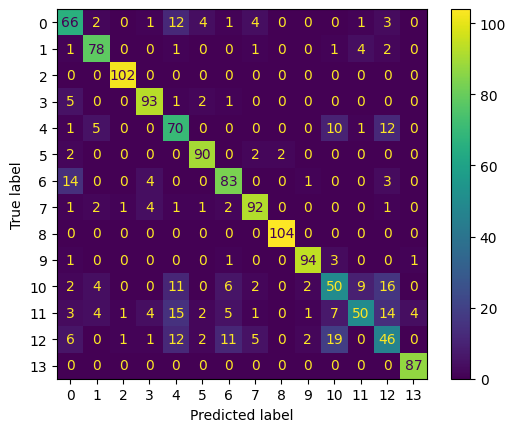

In [22]:
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()